<a href="https://colab.research.google.com/github/aryan-at-ul/image_segmentation/blob/main/feature_extractor_for_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image
import torchvision.io as io
import numpy as np
from IPython.display import Image as dImage


In [56]:
path = "/content/drive/MyDrive/seg_dataset"
pic_one = f"{path}/153077.jpg"
pic_two = f"{path}/153093.jpg"
pic_3 = f"{path}/106024.jpg"
pic_4 = f"{path}/189080.jpg"

In [40]:
model = models.resnet18(pretrained=True)
layer = model._modules.get('avgpool')

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


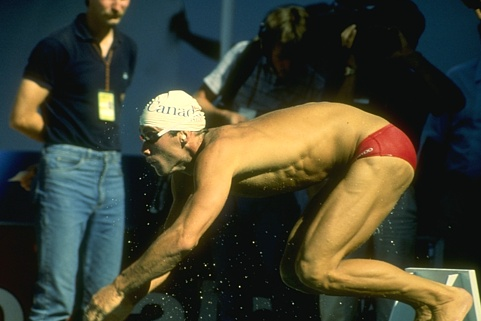

In [41]:
# pic_one = io.read_image(pic_one)
# pic_two = io.read_image(pic_two)
pil_img = dImage(filename=pic_one)
display(pil_img)

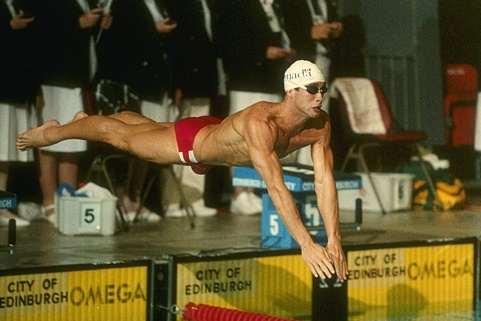

In [42]:
pil_img = dImage(filename=pic_two)
display(pil_img)

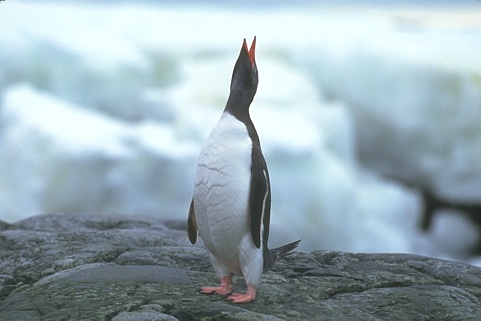

In [55]:
pil_img = dImage(filename=pic_3)
display(pil_img)

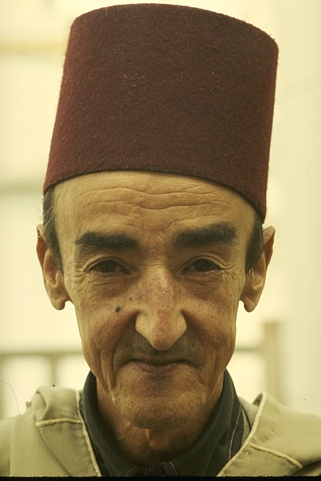

In [57]:
pil_img = dImage(filename=pic_4)
display(pil_img)

In [ ]:
model.eval()

[source - pytorch feature extractor]('https://pytorch.org/blog/FX-feature-extraction-torchvision/#:~:text=FX%20based%20feature%20extraction%20is,node%20represents%20a%20single%20operation.')

In [44]:
from torchvision.models.feature_extraction import get_graph_node_names


In [45]:
nodes, _ = get_graph_node_names(model)


In [46]:
print(nodes)

['x', 'conv1', 'bn1', 'relu', 'maxpool', 'layer1.0.conv1', 'layer1.0.bn1', 'layer1.0.relu', 'layer1.0.conv2', 'layer1.0.bn2', 'layer1.0.add', 'layer1.0.relu_1', 'layer1.1.conv1', 'layer1.1.bn1', 'layer1.1.relu', 'layer1.1.conv2', 'layer1.1.bn2', 'layer1.1.add', 'layer1.1.relu_1', 'layer2.0.conv1', 'layer2.0.bn1', 'layer2.0.relu', 'layer2.0.conv2', 'layer2.0.bn2', 'layer2.0.downsample.0', 'layer2.0.downsample.1', 'layer2.0.add', 'layer2.0.relu_1', 'layer2.1.conv1', 'layer2.1.bn1', 'layer2.1.relu', 'layer2.1.conv2', 'layer2.1.bn2', 'layer2.1.add', 'layer2.1.relu_1', 'layer3.0.conv1', 'layer3.0.bn1', 'layer3.0.relu', 'layer3.0.conv2', 'layer3.0.bn2', 'layer3.0.downsample.0', 'layer3.0.downsample.1', 'layer3.0.add', 'layer3.0.relu_1', 'layer3.1.conv1', 'layer3.1.bn1', 'layer3.1.relu', 'layer3.1.conv2', 'layer3.1.bn2', 'layer3.1.add', 'layer3.1.relu_1', 'layer4.0.conv1', 'layer4.0.bn1', 'layer4.0.relu', 'layer4.0.conv2', 'layer4.0.bn2', 'layer4.0.downsample.0', 'layer4.0.downsample.1', 'lay

In [47]:
from torchvision.models.feature_extraction import create_feature_extractor
# Confused about the node specification here?
# We are allowed to provide truncated node names, and `create_feature_extractor`
# will choose the last node with that prefix.
feature_extractor = create_feature_extractor(
	model, return_nodes=['avgpool'])
# `out` will be a dict of Tensors, each representing a feature map
out = feature_extractor(torch.zeros(1, 3, 32, 32))

In [48]:
print(out['avgpool'].shape)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


torch.Size([1, 512, 1, 1])


In [49]:
def fet_img_image(image_path,model):
   img = Image.open(image_path)
   mean = [0.485, 0.456, 0.406] 
   std = [0.229, 0.224, 0.225]
   transform_norm = transforms.Compose([transforms.ToTensor(), 
   transforms.Resize((224,224)),transforms.Normalize(mean, std)])
   # get normalized image
   img_normalized = transform_norm(img).float()
   img_normalized = img_normalized.unsqueeze_(0)
   # input = Variable(image_tensor)
   img_normalized = img_normalized.to(device)
   # print(img_normalized.shape)
   with torch.no_grad():
      model.eval()  
      output =model(img_normalized)
      out = feature_extractor(img_normalized)
      return out

In [60]:
pic_one_feature = fet_img_image(pic_one,model)
pic_two_feature = fet_img_image(pic_two,model)
pic_3_features = fet_img_image(pic_3,model)
pic_4_features = fet_img_image(pic_4,model)

In [51]:
cos = nn.CosineSimilarity(dim=1, eps=1e-6)


In [52]:
output12 = cos(pic_one_feature['avgpool'], pic_two_feature['avgpool'])
print(output12) # looks good since image is of swimmers

tensor([[[0.7381]]])


In [53]:
output13 = cos(pic_one_feature['avgpool'], pic_3_features['avgpool'])
print(output13) 

tensor([[[0.5354]]])


In [54]:
output23 = cos(pic_two_feature['avgpool'], pic_3_features['avgpool'])
print(output23) 

tensor([[[0.5732]]])


In [62]:
output14 = cos(pic_one_feature['avgpool'], pic_4_features['avgpool'])
print(output14) 

tensor([[[0.5924]]])


In [65]:
output34 = cos(pic_3_features['avgpool'], pic_4_features['avgpool'])
print(output34) 

tensor([[[0.4698]]])
